# Testing your code and benchmarking
As we have seen [yesterday](../day-2/fdbasics.ipynb), it is possible to use the finite difference method to solve equations, and if we use a sufficiently high resolution we can get a very precise solution. But is it correct? It can be difficult to know without directly comparing our solutions to known correct values. This process will be the focus of this lesson.

## Sources of error (revisited)
We have focussed thus far on using the finite difference method to approximate solutions to equations that we cannot directly integrate. As we have seen, the definition of a derivative is

$$\frac{\mathrm{d}f}{\mathrm{d}x}\rvert_{x=x_0} = \lim_{\Delta x \rightarrow 0} \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x},$$

which we can approximate in a number of forms by removing the limit $\Delta x \rightarrow 0$. For example, we have seen that for forward differences we can state

$$\frac{\mathrm{d}f}{\mathrm{d}x}\rvert_{x=x_0} \approx \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}.$$

And again, as long as $\Delta x$ is “small enough”, the error that is introduced in this approximation is fairly small. So the question is, how do we know when $\Delta x$ is small enough to not introduce significant error? Before we can answer that question, we need to say a few things about the sources of error in any computer-based calculation and how we can calculate these errors.

In computations there are essentially three different sources of error we can consider:

- **Gross error**: A mistake in the program itself, a bug.
- **Truncation error**: Error introduced by approximating the solution to a problem, such as using a finite-difference solution rather than direct integration of an equation. You might recall this is the error we introduce by [truncating the Taylor series expansion](../day-2/fdbasics.ipynb#Taylor-series-approach;-accuracy) of a function $f(x)$.
- **Roundoff error**: Error related to the computers inability to exactly represent floating point numbers. We have seen some examples of roundoff error as well at the [start of the introduction to finite differences](../day-2/fdbasics.ipynb#Introduction-to-finite-differences).

Although all three of these sources of error can appear in our programs, we mainly will focus on issues related to truncation error in our discussion in the following sections.

## Calculating error
Now that we have a sense of the different types of error we might encounter, we can turn our focus to how error can be calculated. Simply put, the **error** in a calculation is simply the difference between the calculated value and the actual value. In other words,

$$E = \bar{x} - x$$

where $E$ is the error in the calculated value $x$ compared to its true value $\bar{x}$. Another common way in which error is represented is as **relative error** ($RE$), which is simply the error divided by the true value,

$$RE = \frac{E}{\bar{x}}$$

For our purposes we will mainly consider the **percent error** ($PE$), which is just the relative error multiplied by 100

$$PE = 100 RE.$$

## How do you know when your solution is “correct”?

In order to determine whether or not we need to be concerned with errors in our estimates, we need to compare our estimate to the true values as seen above. This process is often referred to as **benchmarking** or **stability testing**. How do we do this in practice? We recommend the following procedure:

1. Start with using an approximate solution for which a true value can be calculated. It is obviously not possible to make a comparison if you don’t know the true values.
2. Assuming you have an equation the will allow you to calculate true values at any location within the domain of your problem, begin by calculating the estimated values and true values at the same spatial (and/or temporal) locations.
3. For each estimate and corresponding true value, calculate the percent error and store its value.
4. Review the output in a form that makes sense to you. Possibilities include
    - Calculating the mean percent error, or its maximum
    - Plotting the percent error along with the estimated values
    - Summing the percent error

### Exercise - Spatial errors in heat conduction

Now that you hopefully have a working solution to the heat advection-diffusion equation in one dimension we can assess the magnitude of error we introduce when poorly discretizing the problem in space. In other words, how bad do things get when we only estimate temperatures at distant points? For this exercise, you can use either your existing solution to the 1D heat advection-diffusion equation or the code in the cell below.

#### Tasks

1. Add the calculation of two analytical solutions for heat conduction to the bottom of the code. These will be used for comparison with the finite difference calculations. The analytical solutions to add are **(1) steady-state advection with no heat production**

    $$T(x) = T_{L} \left( \frac{1 - \exp{(v_{x} x / \kappa)}}{1 - \exp{(v_{x} L / \kappa)}} \right)$$

    where $T_{L}$ is the temperature at the bottom of the model, $v_{x}$ is the advection velocity, $L$ is the model thickness, and $\kappa$ is the thermal diffusivity ($\kappa = k / \rho C_{\mathrm{p}}$), and **(2) steady-state heat conduction with heat production, but no advection**
    
    $$T(x) = \frac{x T_{L}}{L} + \frac{h^{2}_{\mathrm{r}} H}{k} \left( \left( 1 - \exp{(-x / h_{\mathrm{r}})}\right) - \left( 1 - \exp{(-L / h_{\mathrm{r}})}\right) \frac{x}{L} \right)$$

    where $h_{\mathrm{r}}$ is the depth at which the concentration of heat producing elements decreases by $1/e$. Since we do not include this behavior in our model, we will assume that $h_{\mathrm{r}} = 10000$ km.
    
2. Implement the calculation of the analytical solutions (true values) at the end of the code just above the plotting so that the true values are calculated at the same spatial locations $x$ as the finite difference calculations. You can set things up so that you calculate `Tss_adv` for the advection case and `Tss_hp` for the heat production case.
3. Add the necessary code to be able to plot either one of the analytical solutions with the finite difference solution.
4. Since we are comparing against steady-state solutions, we need to be sure that our model has reached a thermal steady state. We can estimate the time needed to reach steady state using the characteristic timescale for diffusion $\tau$

    $$\tau = \frac{L^{2}}{\kappa}.$$

    calculate the characteristic timescale for your models using the values in the code and be sure to set `t_total` to be larger than that timescale (perhaps even twice as large to be safe).
5. Starting with `nx = 6`), calculate the percent error in the calculated temperature for each location of $x$ for the following scenarios:
    - Steady advection-diffusion with no heat production (`vx = 1.0`, `H = 0.0`)
    - Steady heat diffusion and production with no advection (`vx = 0.0`, `H = 1.0`)

    Remember to change which analytical solution is used when you compare to the model output.
6. Add two lines to the code near the end to print out the minimum and maximum percent error to the screen using the `print()` function.

#### Questions

- If you vary the values for `nx`, approximately how many points are required for the percent error to be less than 0.05%?
- Does the percent error continue to decrease as you increase `nx`, or does it a appear to reach a minimum at some point?

#### Notes

- Although it is possible to perform step 5 directly in NumPy and without a for loop, you are advised to use a for loop for calculating the percent error.
- You may want to skip over calculating the percent error for the first temperature point since the true value at the surface is equal to zero, and calculating percent error at the location will result in division by zero.

dx is 7000.0 m
Calculating 10 time steps


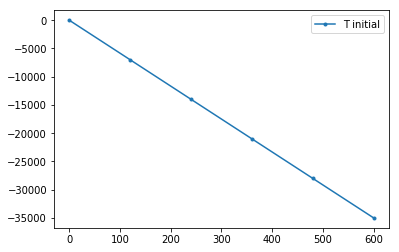

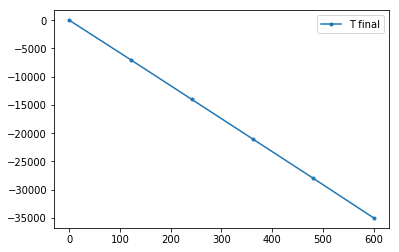

In [4]:
import numpy as np
import matplotlib.pyplot as plt

yr2sec = 60*60*24*365.25  # num of seconds in a year

# Set material properties
rho = 2900   # kg m^-3
Cp = 900     # J kg^-1 K^-1
k = 2.5      # W m^-1 K^-1
H = 1.0      # uW m^-3
vx = 0.0     # mm/a
hr = 10000   # km

# Set geometry and dimensions
L = 35e3         # m
nx = 6           # -
dx = L / (nx-1)  # m
print("dx is", dx, "m")

# NOTE: I have set the sill top and bottom equal to not have an intrusion
silltop = 10e3   # m
sillbott = 10e3  # m

# Convert units
H = H * 1.0e-6                    # uW m^-3 -> W m^-3
vx = -vx / 1000.0 / yr2sec        # mm a^-1 -> m s^-1
hr = hr * 1000                    # km -> m

# Set total time and time step
t_total = 0.1e6 * yr2sec          # s
dt = 1e4 * yr2sec                 # s
nt = int(np.floor(t_total / dt))  # -
print("Calculating", nt, "time steps")

# Set boundary temperature values and intrusion temperature
Tsurf = 0.0        # deg C
Tmoho = 600.0      # deg C
Tintrusion = 700.0 # deg C

# Create arrays to hold temperature fields
Tnew = np.zeros(nx)
Tprev = np.zeros(nx)

# Create coordinates of the grid points
x = np.linspace(0, L, nx)

# Generate initial temperature field
for ix in range(nx):
    if (x[ix] < sillbott) and (x[ix] > silltop):
        Tprev[ix] = Tintrusion
    else:
        Tprev[ix] = x[ix] * (Tmoho - Tsurf) / L

# Plot initial temperature field
plt.plot(Tprev, -x, '.-', label='T initial')
plt.legend()
plt.show()

# Start the loop over time steps
curtime = 0
while curtime < t_total:
    curtime = curtime + dt
    
    # boundary conditions
    Tnew[0] = Tsurf
    Tnew[nx-1] = Tmoho
    
    # internal grid points
    for ix in range(1, nx-1):
        Tnew[ix] = ((k / (rho * Cp)) * (Tprev[ix-1] - 2.0*Tprev[ix] + Tprev[ix+1]) / dx**2 - vx * (Tprev[ix+1] - Tprev[ix-1]) / dx + H / (rho * Cp)) * dt + Tprev[ix]
        
    # copy Tnew to Tprev
    Tprev[:] = Tnew[:]

# Calculate analytical solution(s)
# 1. Steady-state advection, no heat production
#Tss_adv = 

# 2. Steady-state conduction with heat production, no advection
#Tss_hp = 

# Plot the final temperature field
plt.plot(Tnew, -x, '.-', label='T final')
plt.legend()
plt.show()

### Exercise - Visualizing error (optional)

In the previous exercise we observed error by outputting the minimum and maximum to the screen using the `print()` function. However, it is often nice to not only see the range of error, but also how it varies in your calculation. In other words, it is nice to see where the error is largest, not just how large it may be. In this exercise we will add a plot to those displayed in the heat conduction script to see both the temperatures and percent error side by side.

#### Tasks

1. Taking your code from the previous exercise, you will need to make some changes to the plotting at the end of the script to be able to display two plots side by side. You can start by making the changes below in your code:

    ```python
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(Tnew, -x, '.-')
    ax1.plot(T_ss_adv, -x, '-')
    ax1.set_xlabel("Temperature (C)")
    ax1.set_ylabel("Depth (km)")
    # Plot percent error below
    ax2.plot()
    ax2.set_xlabel("")
    plt.show()
    ```

    The main changes above are (1) changing the `plt.subplots()` function to produce 1 row of plots with 2 columns of plots, and referring to those as `ax1` and `ax2`, (2) replacing the `plt.xlabel()` and `plt.ylabel()` with their equivalent commands for each plot, and (3) adding the second plot as `ax2`.
2. With the changes above, insert the variables you want to plot on the $x$ and $y$ axes of the second plot in the `ax2.plot()` function, using the plot format `'-*'`.
3. Add a label for the $x$ axis for the second plot.

#### Questions

- If you perform a similar analysis to that done in the previous exercise (changing `nx` and viewing the resulting error), does this seem more helpful than simply looking at the minimum and maximum error values?
- Do you see any changes in terms of where the error occurs, or its magnitude at different depths when you change `nx`?

## Stability for advection problems
We have observed that changing the spatial resolution (distance between calculation points) can affect the error in our finite difference solutions. Specifically, larger distances between points tends to increase error. We have also been [introduced](../day-2/stability.ipynb) to problems with the **stability** of our solutions. As a reminder, the stability of a solution refers to whether or not a small change in the parameters of the system results in unstable growth of errors. For problems involving time, a stable solution should either show a decrease in error with time or errors that do not change with time. An unstable solution will show growth of errors with time that do not become bounded, and often grow larger over time.

Yesterday we dealt mainly with diffusion of thermal energy and encountered a *stability condition for diffusion problems*

$$\frac{\kappa \Delta t}{\Delta x^2} \leq \frac{1}{2}$$

where $\kappa$ is the thermal diffusivity, $\Delta t$ is the time step, and $\Delta x$ is the grid spacing.
This condition ensures that the length scale for diffusion does not exceed the length scale of the grid spacing and that error does not grow with time. As mentioned, it is often the case that a more strict stability condition is used such as $\frac{\kappa \Delta t}{\Delta x^2} \leq \frac{1}{4}$. 

Like diffusion problems, advection problems also have various criteria that can be used to ensure stability of the solution and the range of parameters that result in stable behavior. For example, it is common to use the calculation of the Courant-Friedrichs-Lewy (or CFL) condition in problems that involve advection. The CFL condition states that the distance material is advected should not exceed the distance between points in the solution grid. In mathematical terms, the CFL condition is

$$C = \frac{u \Delta t}{\Delta x} \leq C_{\mathrm{max}}$$

where $u$ is the velocity of advection. We expect a stable solution as long as $C_{\mathrm{max}} \leq 1.0$. In fact, like the case for diffusion many people use a smaller value to ensure stability with a typical value of $C_{\mathrm{max}} \leq 0.5$ to ensure a stable solution.

### Exercise - The time bomb

We’ll now take a look and an example of how a solution might become unstable. We will again use our advection-diffusion solution, this time exploring the effect of changes in time step. A copy of the code from the last exercise is below, minus the plotting of the analytical solutions.

#### Questions

- Using a spatial grid resolution of `nx = 30`, what do you observe as you increase the time step increment `dt` from $10^{4}$ years? Try increasing in steps of $1 \times 10^{4}$ until you notice a change in the calculated temperatures.
- Do you observe any surprising changes in the error?
- Why do you think this might occur?
- Can you relate this to our stability criteria?

dx is 1206.896551724138 m
Calculating 1000 time steps


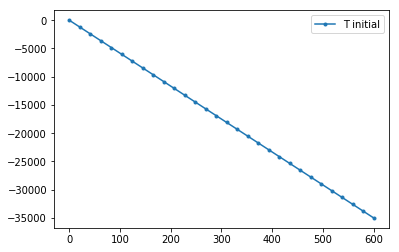

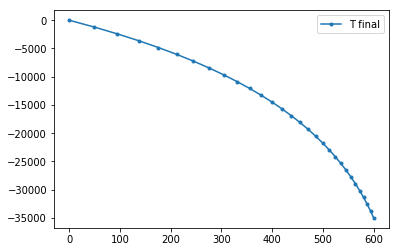

In [5]:
import numpy as np
import matplotlib.pyplot as plt

yr2sec = 60*60*24*365.25  # num of seconds in a year

# Set material properties
rho = 2900   # kg m^-3
Cp = 900     # J kg^-1 K^-1
k = 2.5      # W m^-1 K^-1
H = 0.0      # uW m^-3
vx = 1.0     # mm/a

# Set geometry and dimensions
L = 35e3         # m
nx = 30         # -
dx = L / (nx-1)  # m
print("dx is", dx, "m")

# NOTE: I have set the sill top and bottom equal to not have an intrusion
silltop = 10e3   # m
sillbott = 10e3  # m

# Convert units
H = H * 1.0e-6                    # uW m^-3 -> W m^-3
vx = -vx / 1000.0 / yr2sec        # mm a^-1 -> m s^-1

# Set total time and time step
t_total = 10.0e6 * yr2sec          # s
dt = 1e4 * yr2sec                 # s
nt = int(np.floor(t_total / dt))  # -
print("Calculating", nt, "time steps")

# Set boundary temperature values and intrusion temperature
Tsurf = 0.0        # deg C
Tmoho = 600.0      # deg C
Tintrusion = 700.0 # deg C

# Create arrays to hold temperature fields
Tnew = np.zeros(nx)
Tprev = np.zeros(nx)

# Create coordinates of the grid points
x = np.linspace(0, L, nx)

# Generate initial temperature field
for ix in range(nx):
    if (x[ix] < sillbott) and (x[ix] > silltop):
        Tprev[ix] = Tintrusion
    else:
        Tprev[ix] = x[ix] * (Tmoho - Tsurf) / L

# Plot initial temperature field
plt.plot(Tprev, -x, '.-', label='T initial')
plt.legend()
plt.show()

# Start the loop over time steps
curtime = 0
while curtime < t_total:
    curtime = curtime + dt
    
    # boundary conditions
    Tnew[0] = Tsurf
    Tnew[nx-1] = Tmoho
    
    # internal grid points
    for ix in range(1, nx-1):
        Tnew[ix] = ((k / (rho * Cp)) * (Tprev[ix-1] - 2.0*Tprev[ix] + Tprev[ix+1]) / dx**2 - vx * (Tprev[ix+1] - Tprev[ix-1]) / dx + H / (rho * Cp)) * dt + Tprev[ix]
        
    # copy Tnew to Tprev
    Tprev[:] = Tnew[:]

# Plot the final temperature field
plt.plot(Tnew, -x, '.-', label='T final')
plt.legend()
plt.show()